In [166]:
!pip install klib

In [228]:
!pip install dtreeviz

In [168]:
!pip install lazypredict

In [229]:
import graphviz.backend as be

#**Importing Dataset**

In [172]:
#data wrangling
import pandas as pd
#calculation libraries
import numpy as np
#feature selection
from sklearn.feature_selection import  SelectKBest,chi2
from imblearn.pipeline import make_pipeline

In [173]:
# for ignoring waring and show max rows and columns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [174]:
#Exploratory data analysis
#importing dataset
df=pd.read_csv("/content/pokemon_alopez247.csv")

In [175]:
df.head(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.88,Monster,Grass,False,0.71,6.90,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.88,Monster,Grass,False,0.99,13.00,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.88,Monster,Grass,True,2.01,100.00,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.88,Monster,Dragon,False,0.61,8.50,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.88,Monster,Dragon,False,1.09,19.00,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Red,True,0.88,Monster,Dragon,True,1.70,90.50,45,bipedal_tailed
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Blue,True,0.88,Monster,Water_1,False,0.51,9.00,45,bipedal_tailed
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,Blue,True,0.88,Monster,Water_1,False,0.99,22.50,45,bipedal_tailed
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blue,True,0.88,Monster,Water_1,True,1.60,85.50,45,bipedal_tailed
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Green,True,0.50,Bug,NaN,False,0.30,2.90,255,insectoid


#**Explorating data analysis**

In [176]:
#visualization libraies
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import klib as kl
from   scipy import stats
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [177]:
#Meta-data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [178]:
#duplicate value for the attribute .
df.duplicated().sum()

0

In [179]:
#statistical analysis of datasets
df.describe(include='all')

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
count,721.00,721,721,350,721.00,721.00,721.00,721.00,721.00,721.00,721.00,721.00,721,721,721,644.00,721,191,721,721.00,721.00,721.00,721
unique,NaN,721,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10,2,NaN,15,13,2,NaN,NaN,NaN,14
top,NaN,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Blue,True,NaN,Field,Dragon,False,NaN,NaN,NaN,bipedal_tailed
freq,NaN,1,105,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675,134,644,NaN,169,35,675,NaN,NaN,NaN,158
mean,361.00,NaN,NaN,NaN,417.95,68.38,75.01,70.81,68.74,69.29,65.71,3.32,NaN,NaN,NaN,0.55,NaN,NaN,NaN,1.14,56.77,100.25,NaN
std,208.28,NaN,NaN,NaN,109.66,25.85,28.98,29.30,28.79,27.02,27.28,1.67,NaN,NaN,NaN,0.20,NaN,NaN,NaN,1.04,89.10,76.57,NaN
min,1.00,NaN,NaN,NaN,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.10,0.10,3.00,NaN
25%,181.00,NaN,NaN,NaN,320.00,50.00,53.00,50.00,45.00,50.00,45.00,2.00,NaN,NaN,NaN,0.50,NaN,NaN,NaN,0.61,9.40,45.00,NaN
50%,361.00,NaN,NaN,NaN,424.00,65.00,74.00,65.00,65.00,65.00,65.00,3.00,NaN,NaN,NaN,0.50,NaN,NaN,NaN,0.99,28.00,65.00,NaN
75%,541.00,NaN,NaN,NaN,499.00,80.00,95.00,85.00,90.00,85.00,85.00,5.00,NaN,NaN,NaN,0.50,NaN,NaN,NaN,1.40,61.00,180.00,NaN


Number              0.00
Name                0.00
Type_1              0.00
Type_2             51.46
Total               0.00
HP                  0.00
Attack              0.00
Defense             0.00
Sp_Atk              0.00
Sp_Def              0.00
Speed               0.00
Generation          0.00
isLegendary         0.00
Color               0.00
hasGender           0.00
Pr_Male            10.68
Egg_Group_1         0.00
Egg_Group_2        73.51
hasMegaEvolution    0.00
Height_m            0.00
Weight_kg           0.00
Catch_Rate          0.00
Body_Style          0.00
dtype: float64


<Axes: >

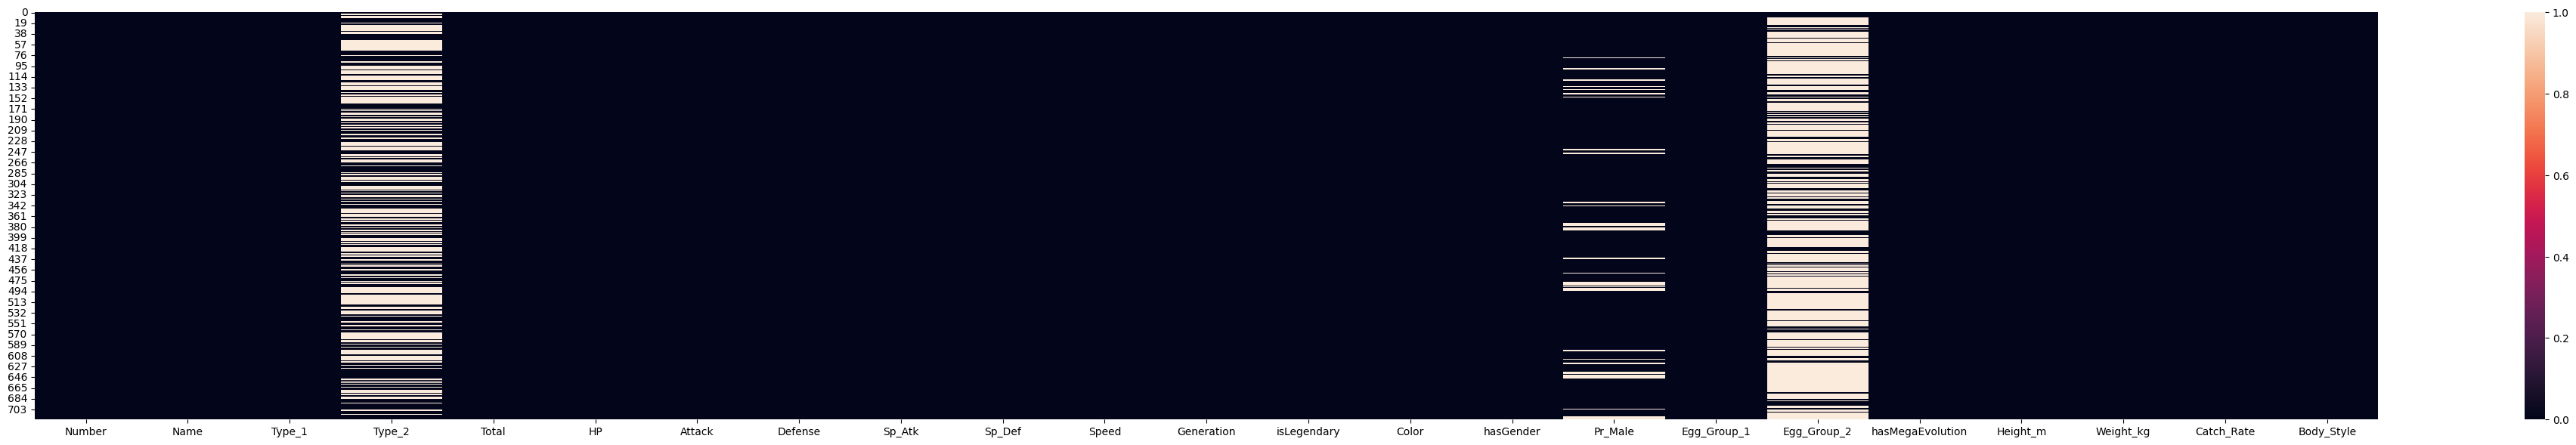

In [180]:
#null value analysis
print(df.isna().mean()*100)
sns.heatmap(df.isna(),color='Purple')

In [181]:
#analysis the categorical coloumns
for i in df.columns:
    if df[i].dtypes==object:
        print(i)
cat=df[["Type_1","Type_2","Color", "Egg_Group_1","Egg_Group_2","Body_Style"]]

for i in cat.columns:
    fig = px.bar(df, x=cat[i], color=df['isLegendary'], barmode='group',
                 labels={'isLegendary': 'Count'},
                 title=f'Count Plot for {i} with Legendary Status')

    fig.update_layout(
        xaxis_title=i,
        yaxis_title='Count',
        legend_title='Legendary',
        showlegend=True
    )

    fig.show()

Name
Type_1
Type_2
Color
Egg_Group_1
Egg_Group_2
Body_Style


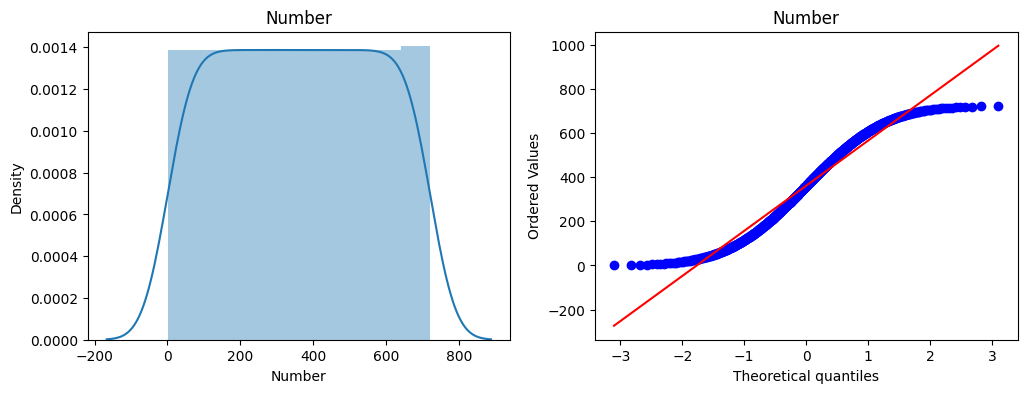

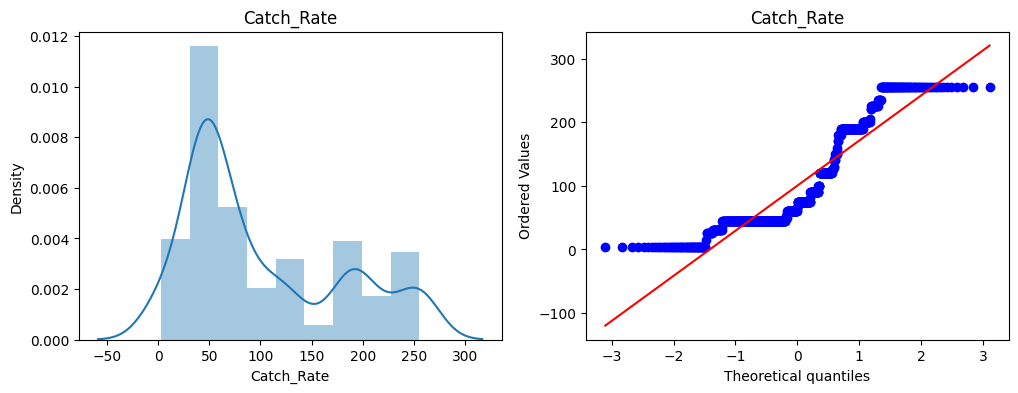

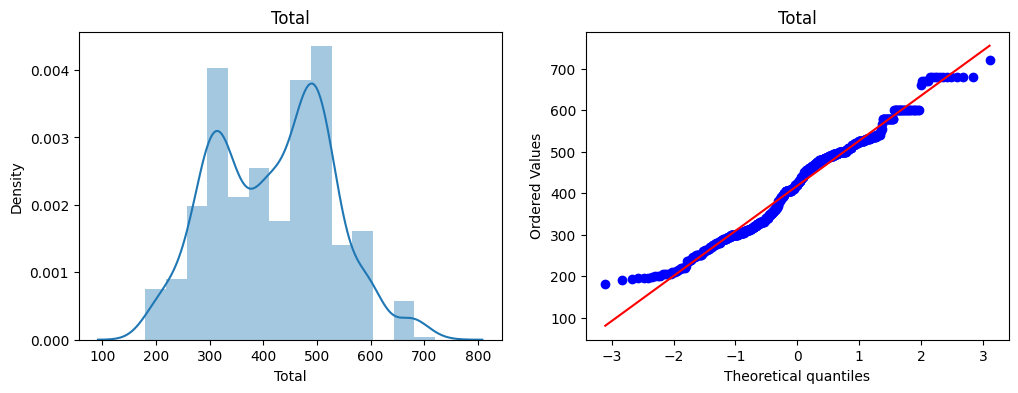

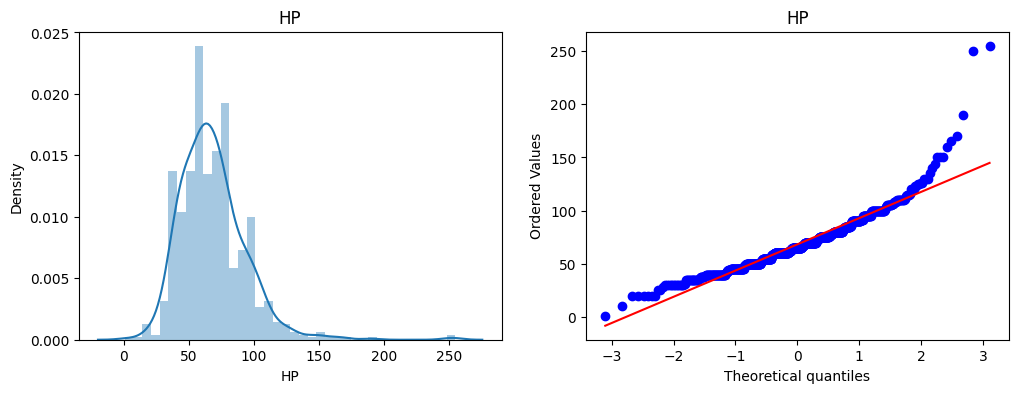

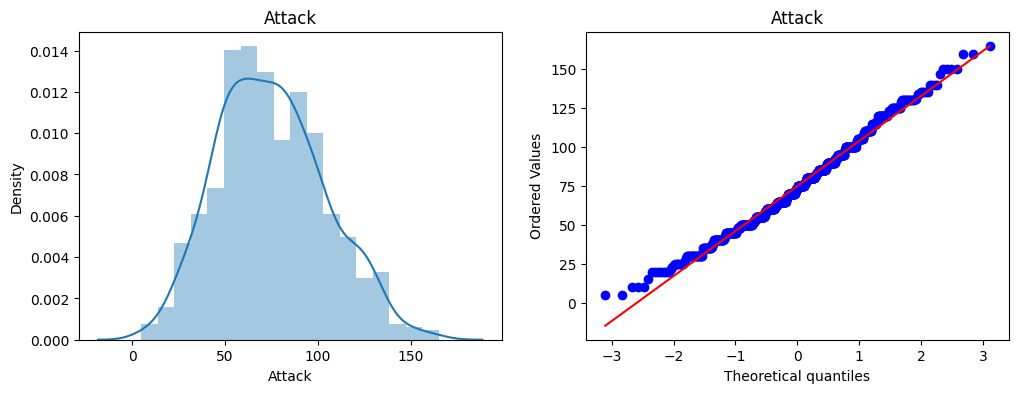

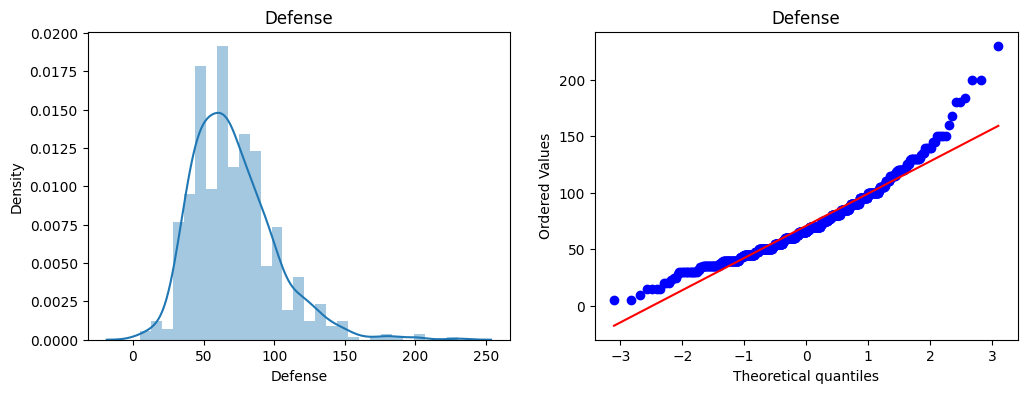

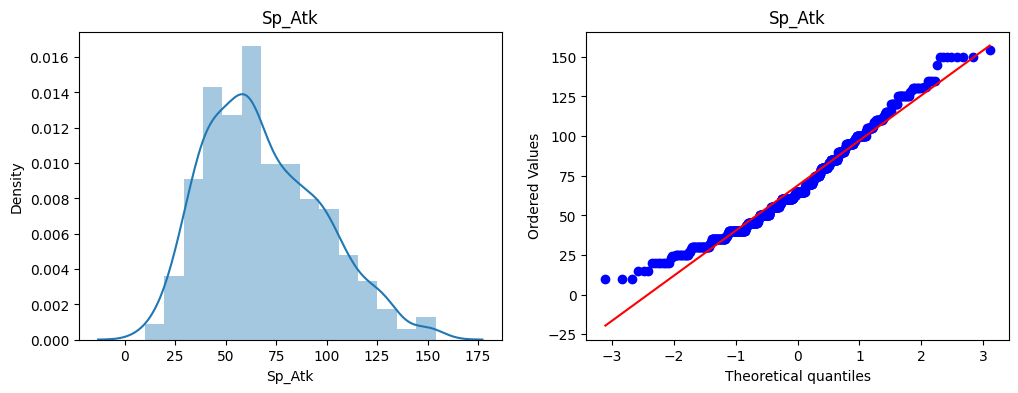

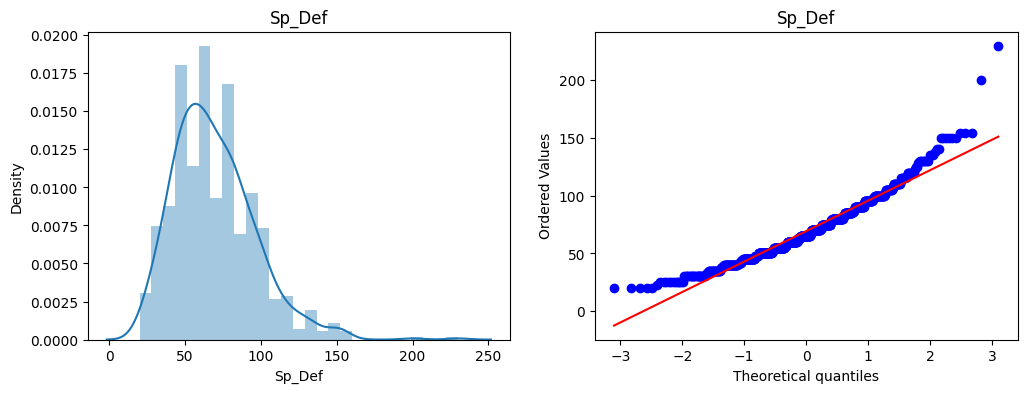

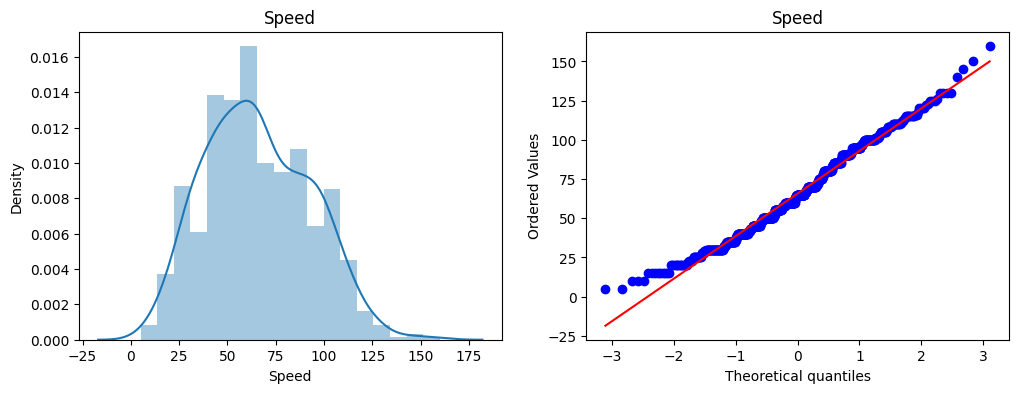

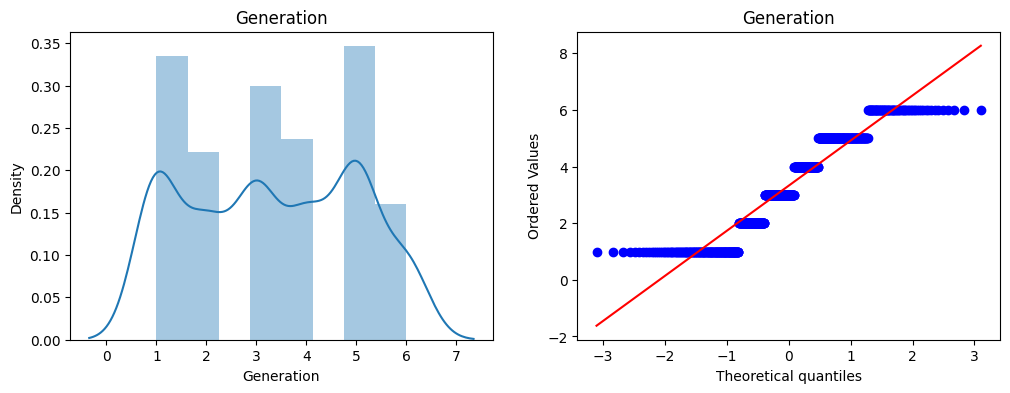

In [182]:
#skewness and qq plot of the train dataset
train=df[['Number','Catch_Rate','Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation']]
#skewness and qq plot of the train dataset
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.distplot(train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

In [183]:
#distribution of values in target column
print(df['isLegendary'].value_counts())
label=({'True','False'})
values=df['isLegendary'].value_counts()
fig = px.pie(labels=label, values=values,title='Distribution of isLegendary',)
fig.update_layout(height=600, width=500)

False    675
True      46
Name: isLegendary, dtype: int64


<Axes: >

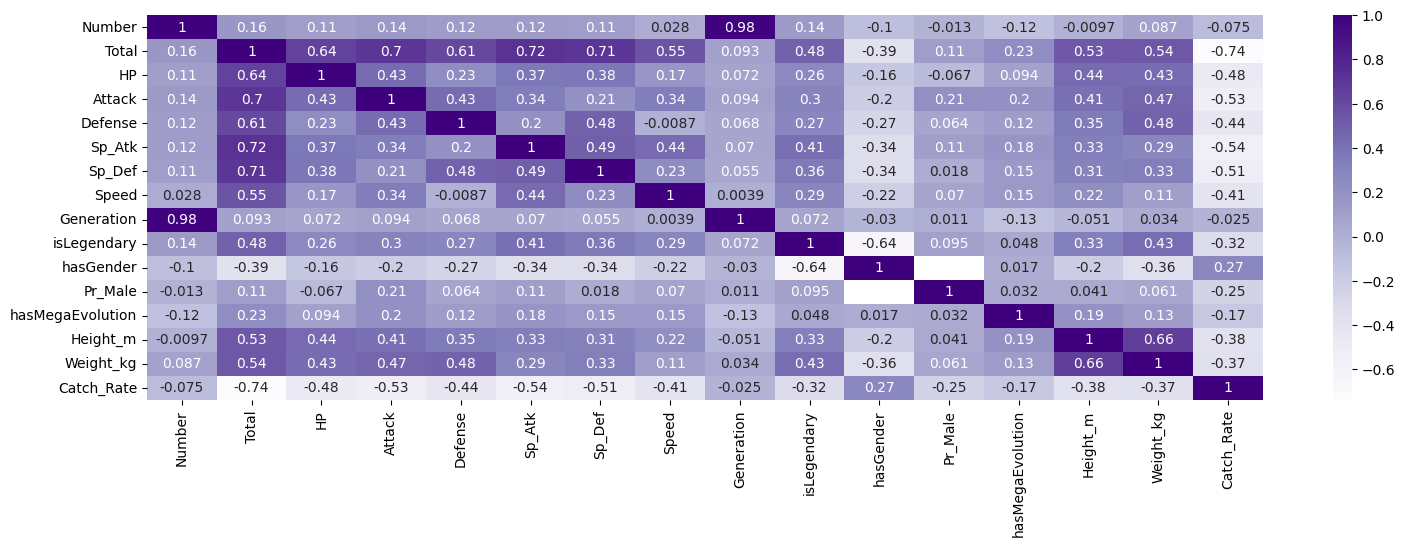

In [184]:
#coorelation of the dataset
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), cmap='Purples', annot = True)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

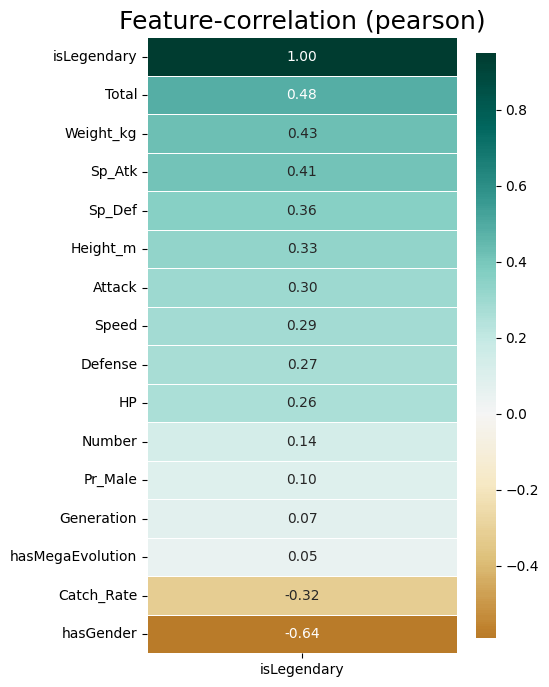

In [185]:
#coorelation of target columns with independent columns
kl.corr_plot(df,figsize=(5,8),target=df['isLegendary'])

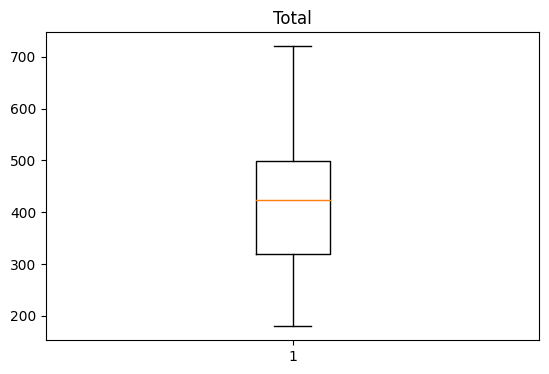

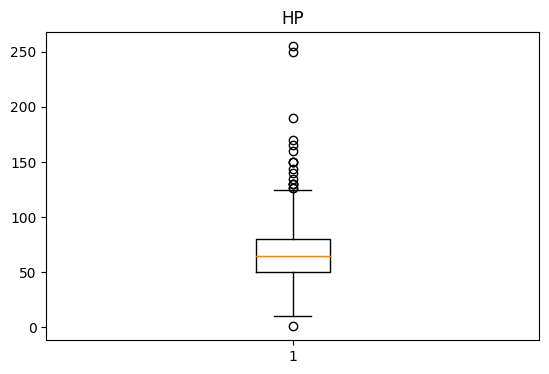

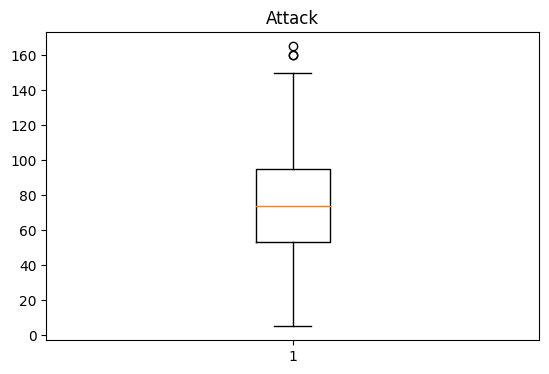

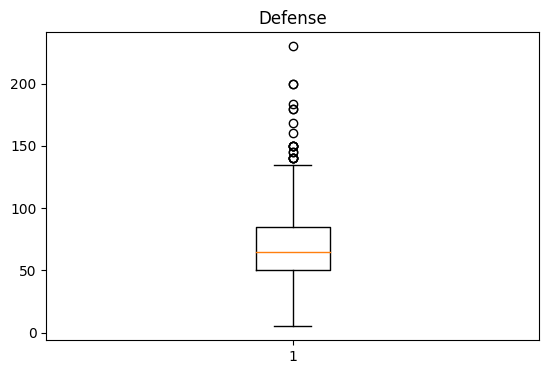

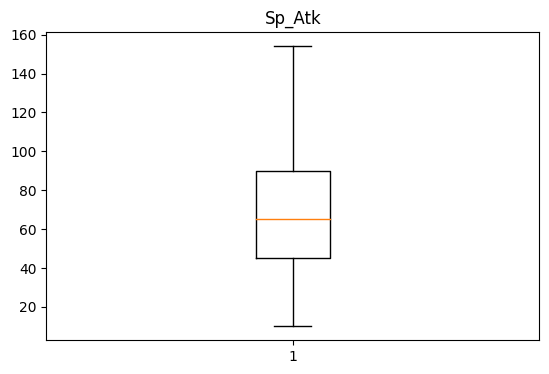

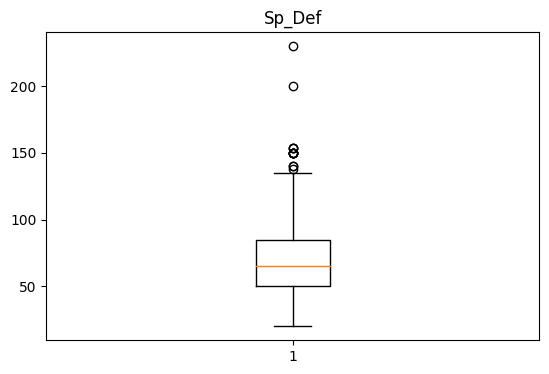

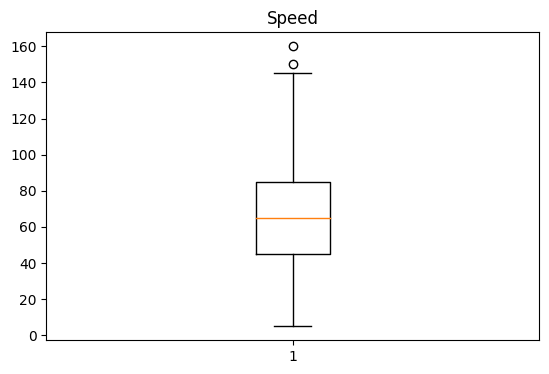

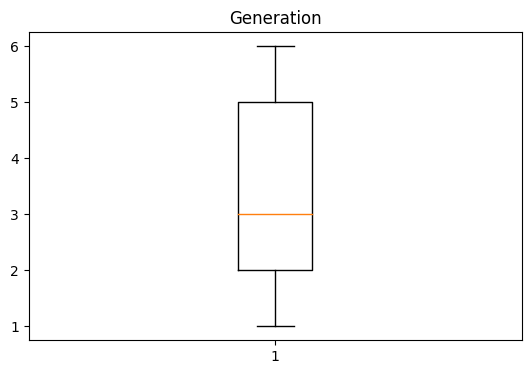

In [186]:
#outlier
n1=df[['Total','HP','Attack','Defense' ,'Sp_Atk', 'Sp_Def' ,'Speed' ,'Generation']]
for col in n1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.boxplot(n1[col])
    plt.title(col)

#**Data Pre-processing and Feature Engineering**

In [187]:
df['Pr_Male']=df['Pr_Male'].fillna(0.553) #filling mean value()
df['Type_2'] =df['Type_2'].fillna(0)

#Missing value :-
#. Droping dataset value which have 0 or negative relation with target columns.
#. Droping dataset having high null value.
df.drop(columns={'Name','Number','Egg_Group_2','Catch_Rate','hasGender'},inplace=True,axis=1)

In [188]:
# converting the dtype of object based columns
df['Type_1']=df['Type_1'].astype(str)
df['Type_2']=df['Type_2'].astype(str)
df['Color']=df['Color'].astype(str)
df['Egg_Group_1']=df['Egg_Group_1'].astype(str)
df['Body_Style']=df['Body_Style'].astype(str)

In [189]:
# no null values are present
df.isnull().sum()

Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
Pr_Male             0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Body_Style          0
dtype: int64

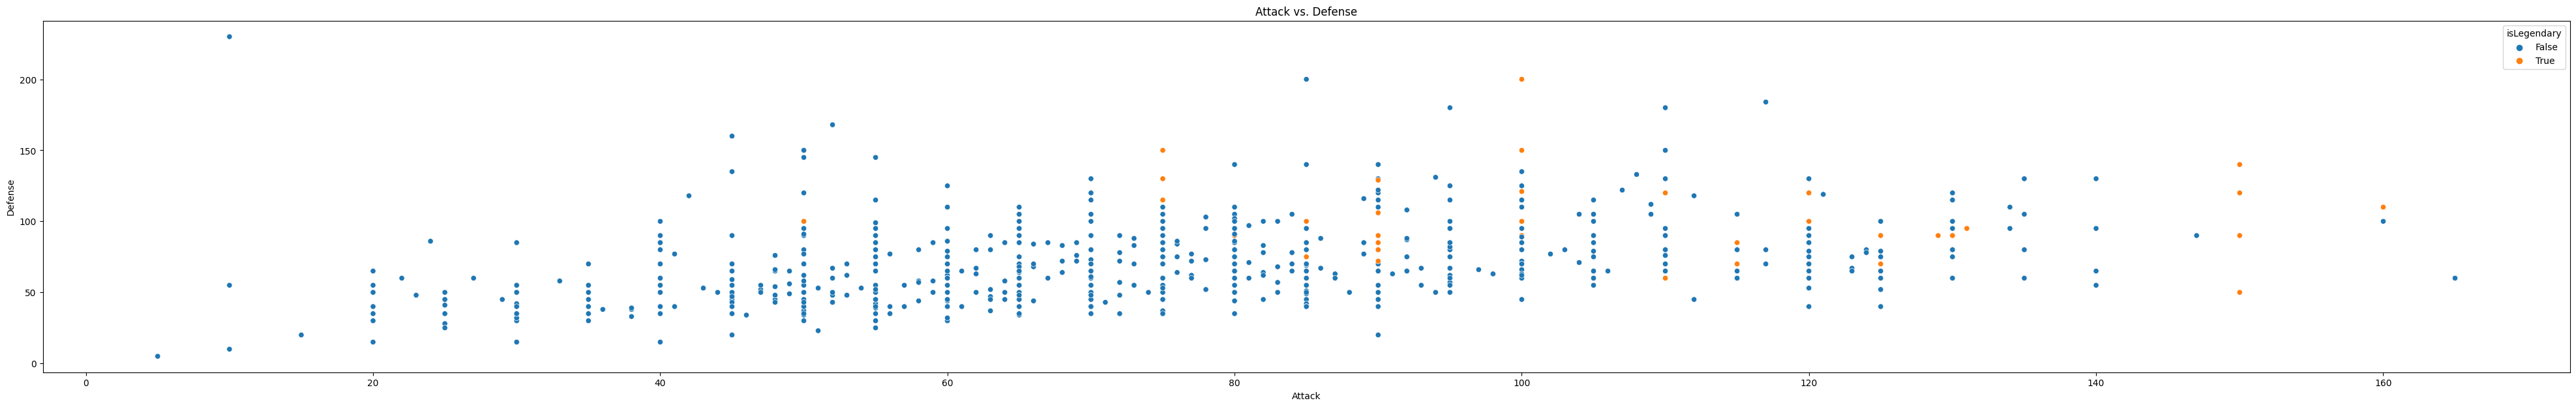

In [246]:
sns.scatterplot(x='Attack', y='Defense', hue='isLegendary', data=df)
plt.title('Attack vs. Defense')
plt.show()

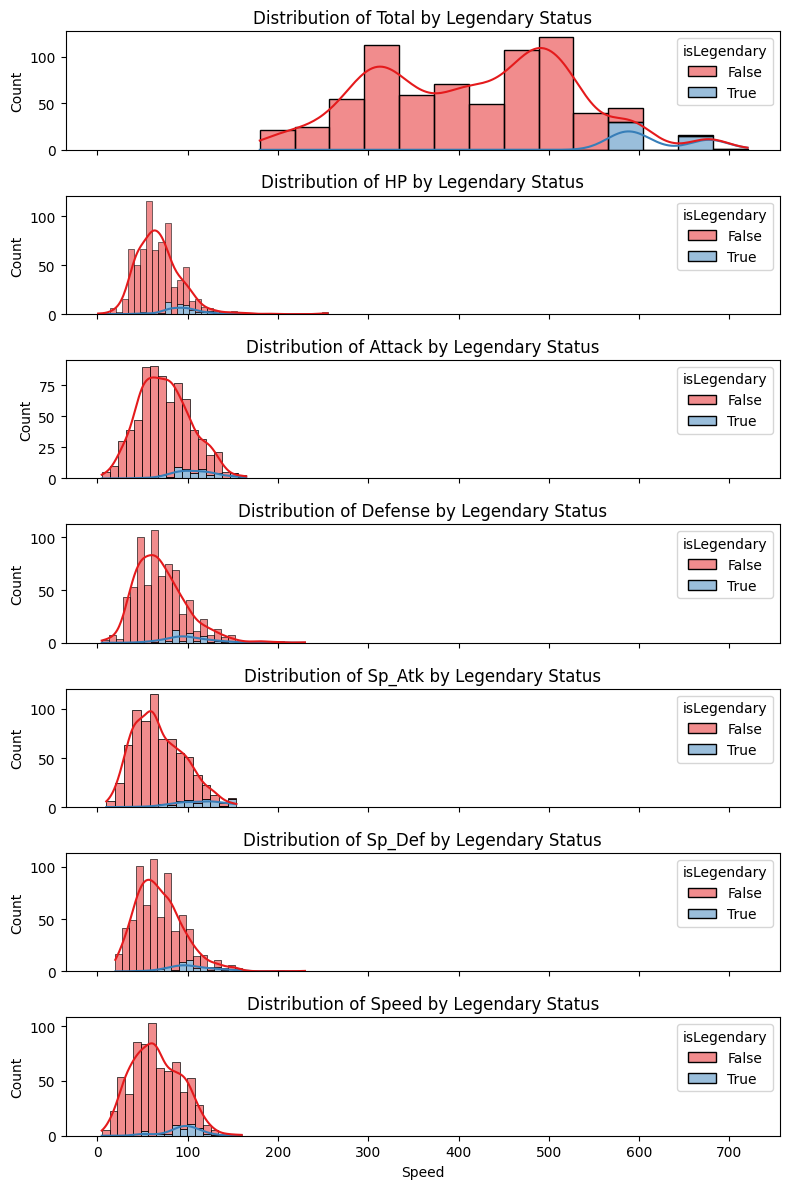

In [191]:
# Select the  numerical columns for distribution plots
selected_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 12), sharex=True)
for i, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, hue='isLegendary', multiple='stack', ax=axes[i], kde=True, palette='Set1')
    axes[i].set_title(f'Distribution of {column} by Legendary Status')
plt.tight_layout()
plt.show()

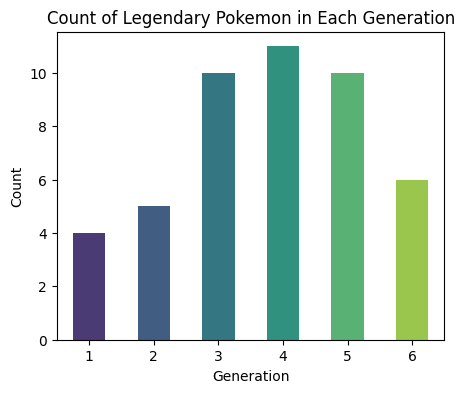

In [192]:
# Count the number of legendary Pokemon in each generation
legendary_count_by_generation = df[df['isLegendary'] == True]['Generation'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=legendary_count_by_generation.index, y=legendary_count_by_generation.values, palette='viridis', width=0.5)
plt.title('Count of Legendary Pokemon in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

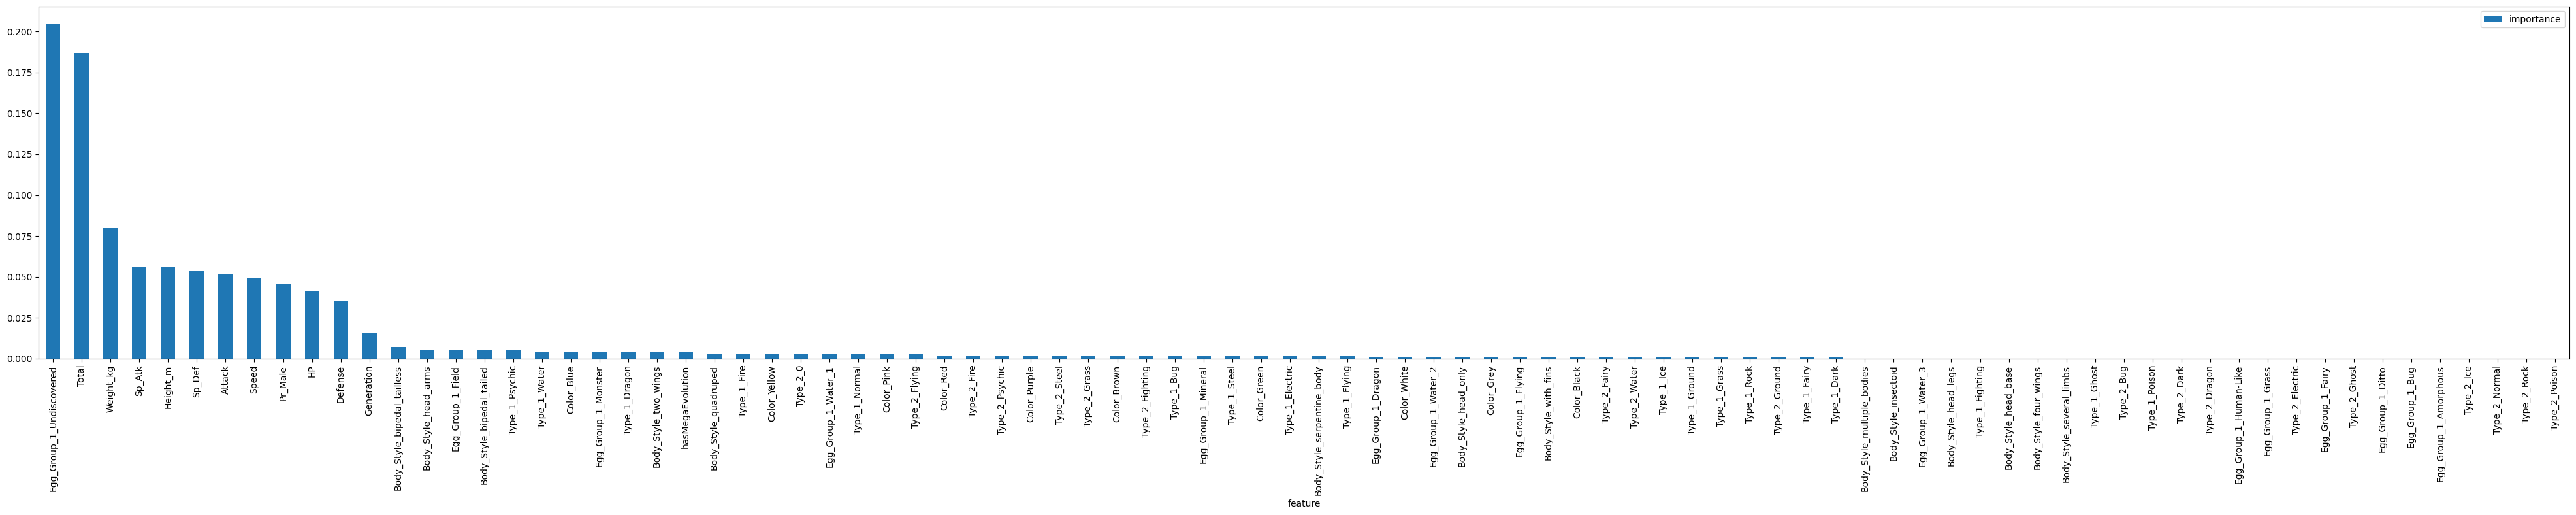

In [193]:
#feautres  importance
from   sklearn.model_selection import train_test_split
x1=df.drop(['isLegendary'],axis=1)
y=df['isLegendary']
X = pd.get_dummies(x1)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

score = np.round(clf.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (50, 7)
importances.plot.bar();

In [194]:
#Get feature importances
feature_importances = clf.feature_importances_

# Pairing feature names with their importance scores
features = list(X.columns)
feature_importance_pairs = list(zip(features, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_importance[:15]  # Displaying the top 15 important features

[('Egg_Group_1_Undiscovered', 0.20494690075315786),
 ('Total', 0.1874902283780675),
 ('Weight_kg', 0.07951657056366966),
 ('Sp_Atk', 0.05640214601771862),
 ('Height_m', 0.055593821358412156),
 ('Sp_Def', 0.0542124076892494),
 ('Attack', 0.05223709561928672),
 ('Speed', 0.04919958980158227),
 ('Pr_Male', 0.045787029133431606),
 ('HP', 0.040745053971439384),
 ('Defense', 0.034532175540117435),
 ('Generation', 0.015621651908677904),
 ('Body_Style_bipedal_tailless', 0.007354578206860519),
 ('Type_1_Psychic', 0.005499029546235791),
 ('Egg_Group_1_Field', 0.0053466728571377265)]

In [195]:
#train test split
x=df.drop(['isLegendary'],axis=1)
y=df['isLegendary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [196]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 17), (145, 17), (576,), (145,))

In [197]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder,PowerTransformer
le=LabelEncoder()
le.fit_transform(y_train)
le.fit(y_test)

LabelEncoder()

In [198]:
print("Distribution of classes before SMOTE:")
print(pd.Series(y_train).value_counts())

Distribution of classes before SMOTE:
False    538
True      38
Name: isLegendary, dtype: int64


<Axes: >

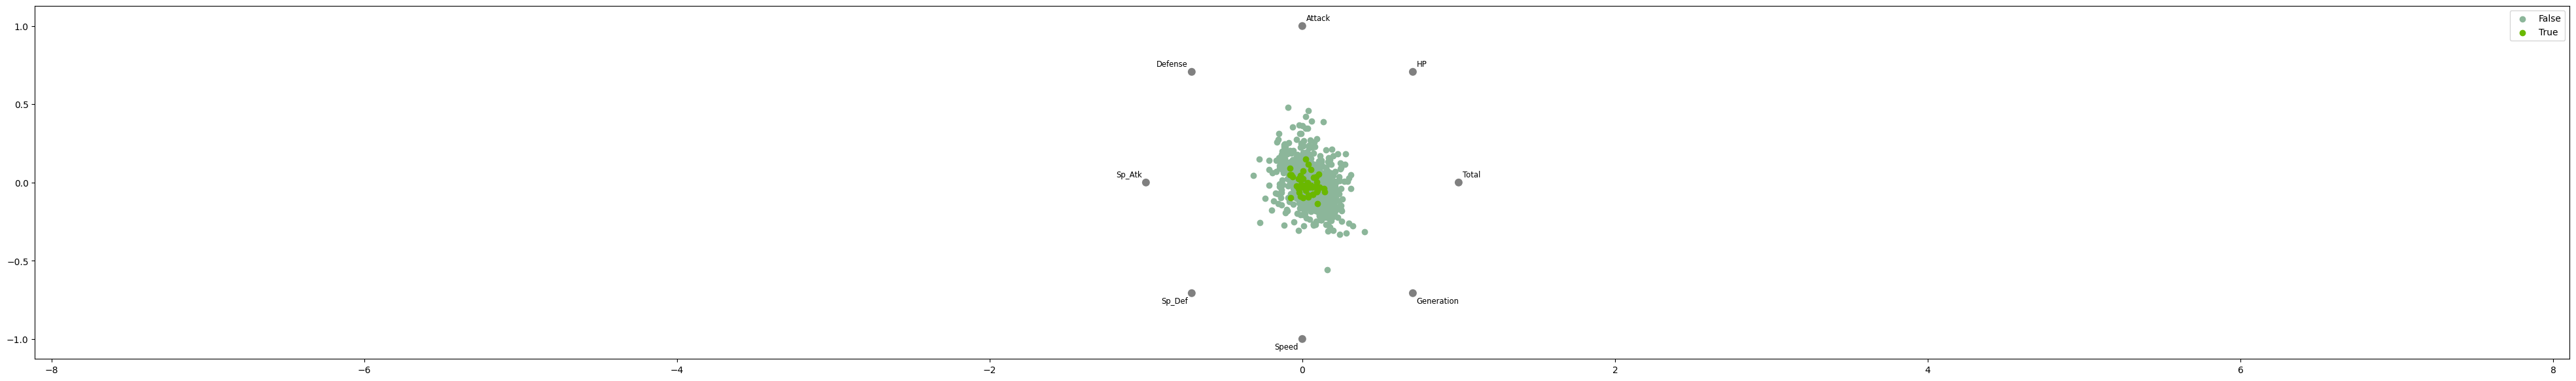

In [199]:
#distribution based on numerical fetures and target fetures
r1=df[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','isLegendary']]
pd.plotting.radviz(r1,'isLegendary') #imbalance dataset look

In [200]:
#ohe
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first')
x_train_ohe=ohe.fit_transform(x_train[["Type_1","Type_2","Color","Egg_Group_1","Body_Style","hasMegaEvolution"]])
x_test_ohe=ohe.transform(x_test[["Type_1","Type_2","Color","Egg_Group_1","Body_Style","hasMegaEvolution"]])

In [201]:
#scaling function using
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
x_train_scale=trf.fit_transform(x_train[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','Pr_Male','Height_m','Weight_kg']])
x_test_scale=trf.transform(x_test[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','Pr_Male','Height_m','Weight_kg']])

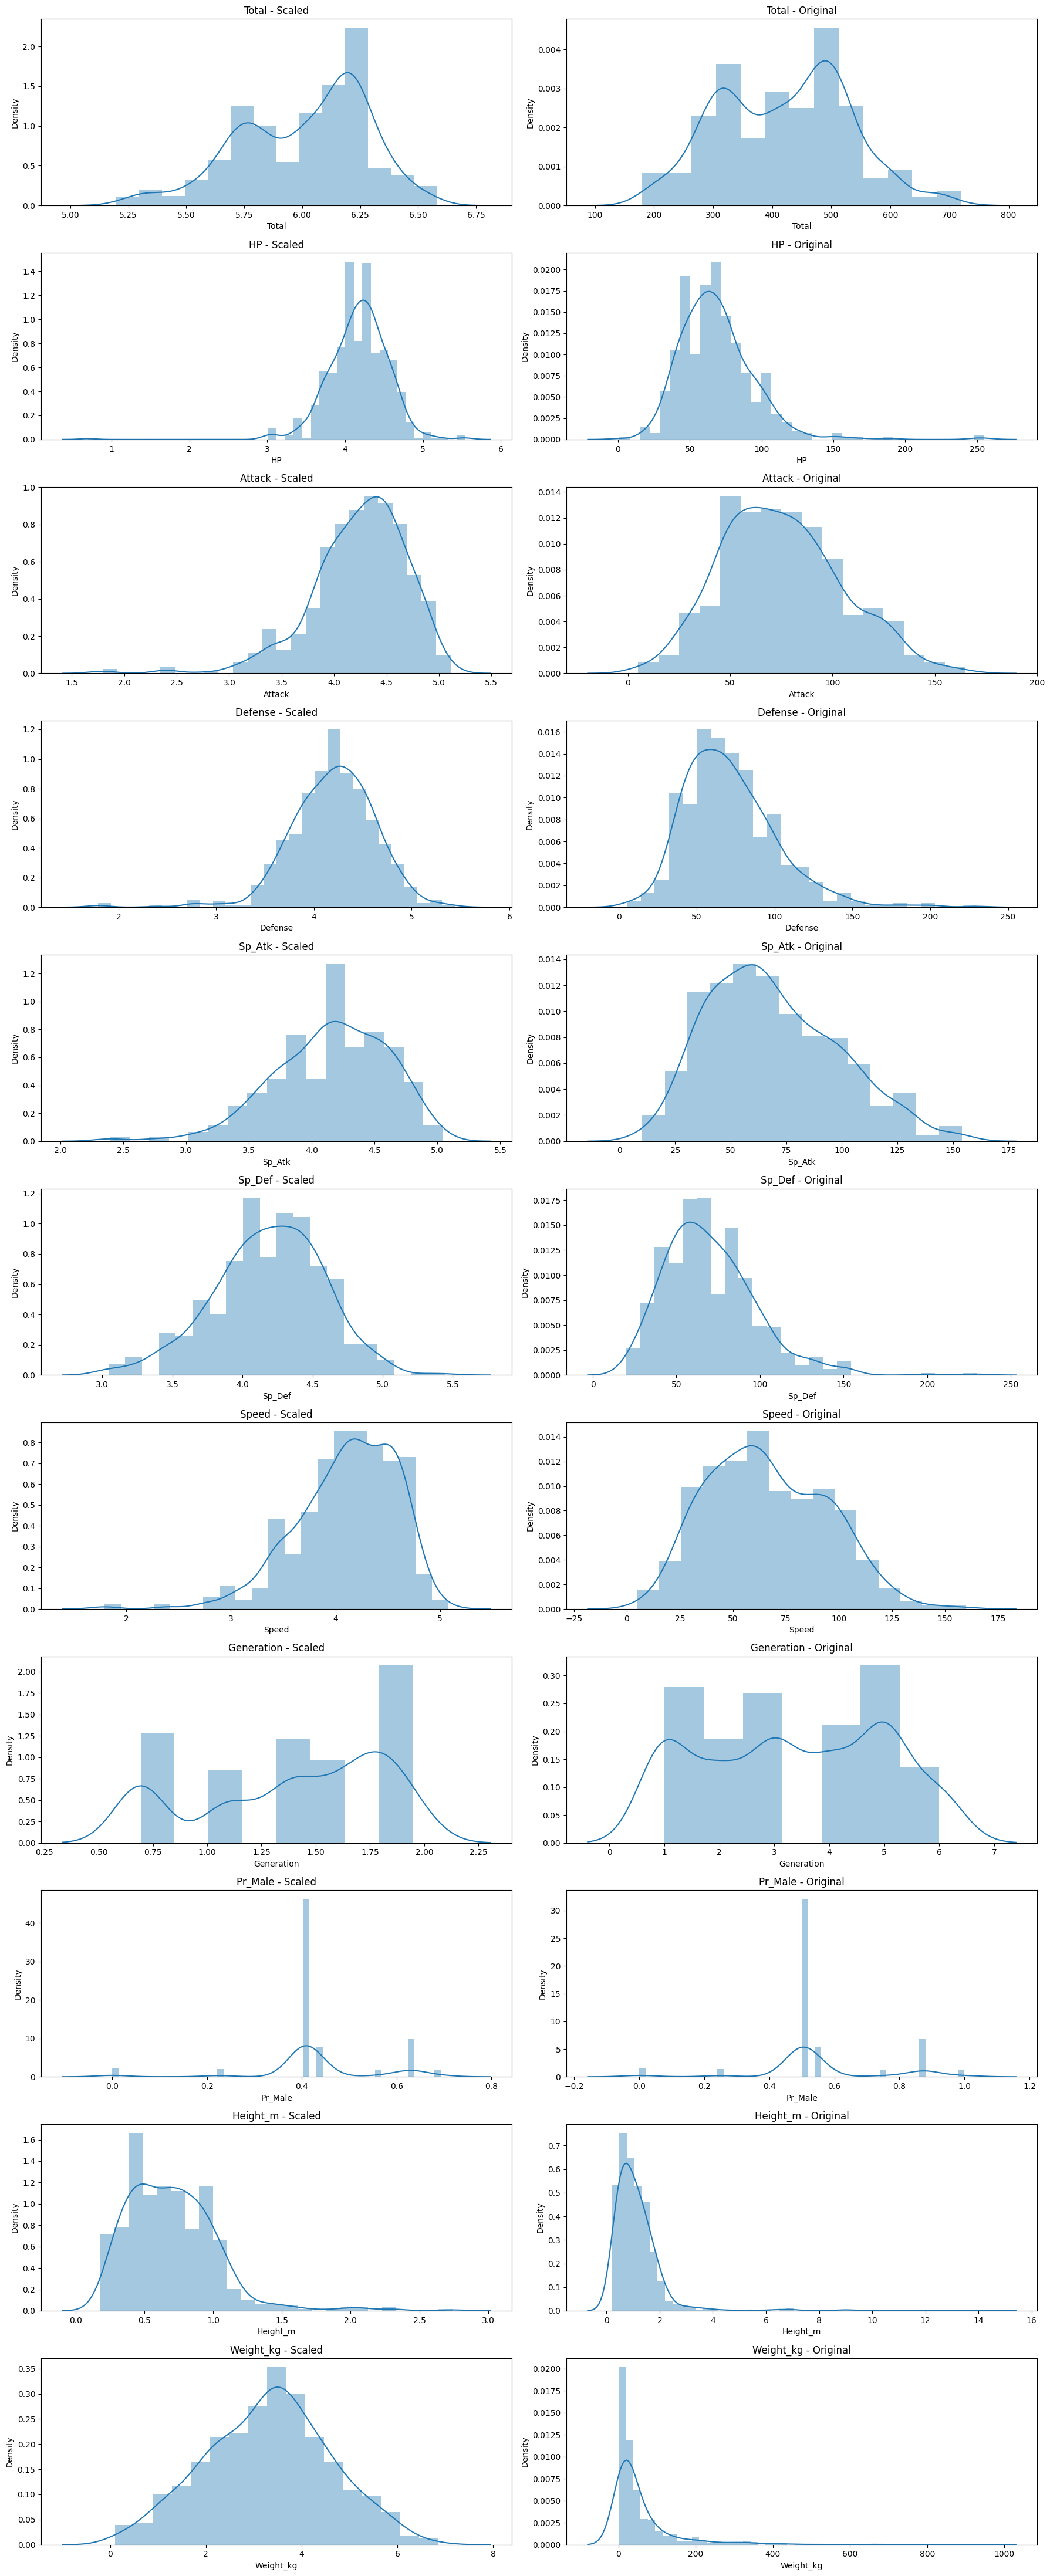

In [202]:
#skewness and qq plot of the train dataset
x_train=x_train[['Total','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','Pr_Male','Height_m','Weight_kg']]

plt.figure(figsize=(18, 4 * len(x_train_scale.columns)))

# Plotting distribution plots for scaled and original features side by side
for i, col in enumerate(x_train_scale.columns):
    plt.subplot(len(x_train_scale.columns), 2, 2 * i + 1)
    sns.distplot(x_train_scale[col])
    plt.title(f'{col} - Scaled')

    plt.subplot(len(x_train_scale.columns), 2, 2 * i + 2)
    sns.distplot(x_train[col])
    plt.title(f'{col} - Original')

plt.tight_layout()
plt.show()

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train_scale)

x_train_scaler=scaler.transform(x_train_scale)
x_test_scaler=scaler.transform(x_test_scale)

In [204]:
x_train = np.concatenate((x_train_ohe,x_train_scaler),axis=1)
x_test  = np.concatenate((x_test_ohe,x_test_scaler),axis=1)

In [205]:
x_train.shape,x_test.shape

((576, 82), (145, 82))

In [206]:
from   imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

# After SMOTE
print("Distribution of classes after SMOTE:")
print(y_train_s.value_counts())

Distribution of classes after SMOTE:
False    538
True     538
Name: isLegendary, dtype: int64


In [207]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth = 8)
gbc.fit(x_train_s, y_train_s)
pred_1 = gbc.predict(x_test)

In [208]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(x_train_s, y_train_s)
pred_2 = lg.predict(x_test)

In [209]:
from   sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_s,y_train_s)
pred_3 = clf.predict(x_test)

In [210]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier()
rc.fit(x_train_s, y_train_s)
pred_4 = rc.predict(x_test)

In [211]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train_s, y_train_s)
pred_5  = sv.predict(x_test)

In [212]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train_s, y_train_s)
pred_6 =xg.predict(x_test)

In [213]:
from   sklearn.metrics import accuracy_score,confusion_matrix,r2_score,precision_score,f1_score,roc_auc_score,classification_report,recall_score
print(accuracy_score(y_test,pred_1))
print(accuracy_score(y_test,pred_2))
print(accuracy_score(y_test,pred_3))
print(accuracy_score(y_test,pred_4))
print(accuracy_score(y_test,pred_5))
print(accuracy_score(y_test,pred_6))

0.993103448275862
0.9793103448275862
0.9862068965517241
0.993103448275862
0.9862068965517241
0.993103448275862


In [214]:
#If the accuracy from the cross-validation method is less than the accuracy from the holdout method, it indicates model overfitting.
from  sklearn.model_selection import cross_val_score
print(cross_val_score(gbc,x_train_s,y_train_s,cv=10).mean())
print(cross_val_score(lg,x_train_s,y_train_s,cv=10).mean())
print(cross_val_score(clf,x_train_s,y_train_s,cv=10).mean())
print(cross_val_score(rc,x_train_s,y_train_s,cv=10).mean())
print(cross_val_score(sv,x_train_s,y_train_s,cv=10).mean())
print(cross_val_score(xg,x_train_s,y_train_s,cv=10).mean())

0.9916407061266874
0.9906974731741087
0.9916407061266874
0.9953444098303912
0.992557978539287
0.9953444098303912


#**Model Evalution**

In [215]:
a=[pred_1,pred_2,pred_3,pred_4,pred_5,pred_6]
for i in a:
    precision = precision_score(y_test,i)
    print('Precision: %f' % precision)

    recall = recall_score(y_test,i)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test,i)
    print('F1-Score: %f\n' % f1)

Precision: 0.888889
Recall: 1.000000
F1-Score: 0.941176

Precision: 0.727273
Recall: 1.000000
F1-Score: 0.842105

Precision: 0.875000
Recall: 0.875000
F1-Score: 0.875000

Precision: 0.888889
Recall: 1.000000
F1-Score: 0.941176

Precision: 0.800000
Recall: 1.000000
F1-Score: 0.888889

Precision: 0.888889
Recall: 1.000000
F1-Score: 0.941176



In [216]:
#algorithm list and their respective complexity
from lazypredict.Supervised import LazyClassifier
clf1 = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf1.fit(x_train_s, x_test, y_train_s, y_test)
models

 97%|█████████▋| 28/29 [00:04<00:00,  3.99it/s]

[LightGBM] [Info] Number of positive: 538, number of negative: 538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3337
[LightGBM] [Info] Number of data points in the train set: 1076, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

100%|██████████| 29/29 [00:04<00:00,  6.37it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.99,1.00,1.00,0.99,0.27
ExtraTreesClassifier,0.99,1.00,1.00,0.99,0.18
XGBClassifier,0.99,1.00,1.00,0.99,0.47
RandomForestClassifier,0.99,1.00,1.00,0.99,1.04
LinearSVC,0.99,1.00,1.00,0.99,0.06
LGBMClassifier,0.99,1.00,1.00,0.99,0.34
CalibratedClassifierCV,0.99,1.00,1.00,0.99,0.19
PassiveAggressiveClassifier,0.99,0.99,0.99,0.99,0.04
NearestCentroid,0.97,0.98,0.98,0.97,0.05


#**HyperParameter_Tunning**

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
param={
    "n_estimators":[10,30,40,50,60,70,80,100,None],
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth":[1,3,5,7,9,10,15,20,25,30],
    "max_features":['sqrt', 'log2', None],
    "bootstrap":[True,False],
    "verbose":[True,False]
}

In [76]:
rf_classifier = RandomForestClassifier()
# Define the parameter grid for Grid Search
#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train_s, y_train_s)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tas

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 30, 40, 50, 60, 70, 80, 100,
                                          None],
                         'verbose': [True, False]},
             scoring='accuracy')

In [77]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 10,
 'verbose': True}

In [78]:
grid_search.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=25, n_estimators=10,
                       verbose=True)

In [79]:
grid_search.best_score_

0.997213608957795

In [217]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier(criterion='log_loss', max_depth=25, n_estimators=8,max_features='sqrt',
                       verbose=True,bootstrap=True,)
rc.fit(x_train_s, y_train_s)
pred_4 = rc.predict(x_test)
print(accuracy_score(y_test,pred_4))

0.9862068965517241


In [165]:
import pickle
pickle.dump(ohe,open('ohe.pkl','wb'))
pickle.dump(trf,open('trf.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rc,open('rc.pkl','wb'))

[Text(0.5416666666666666, 0.9444444444444444, 'x[71] <= 0.836\ngini = 0.5\nsamples = 1076\nvalue = [538, 538]'),
 Text(0.475, 0.8333333333333334, 'gini = 0.0\nsamples = 525\nvalue = [525, 0]'),
 Text(0.6083333333333333, 0.8333333333333334, 'x[53] <= 0.5\ngini = 0.046\nsamples = 551\nvalue = [13, 538]'),
 Text(0.5416666666666666, 0.7222222222222222, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.675, 0.7222222222222222, 'x[16] <= 0.977\ngini = 0.018\nsamples = 543\nvalue = [5, 538]'),
 Text(0.48333333333333334, 0.6111111111111112, 'x[33] <= 0.994\ngini = 0.015\nsamples = 541\nvalue = [4, 537]'),
 Text(0.3, 0.5, 'x[79] <= 0.034\ngini = 0.011\nsamples = 539\nvalue = [3, 536]'),
 Text(0.13333333333333333, 0.3888888888888889, 'x[73] <= 0.764\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4666666666666667, 0.3888888888

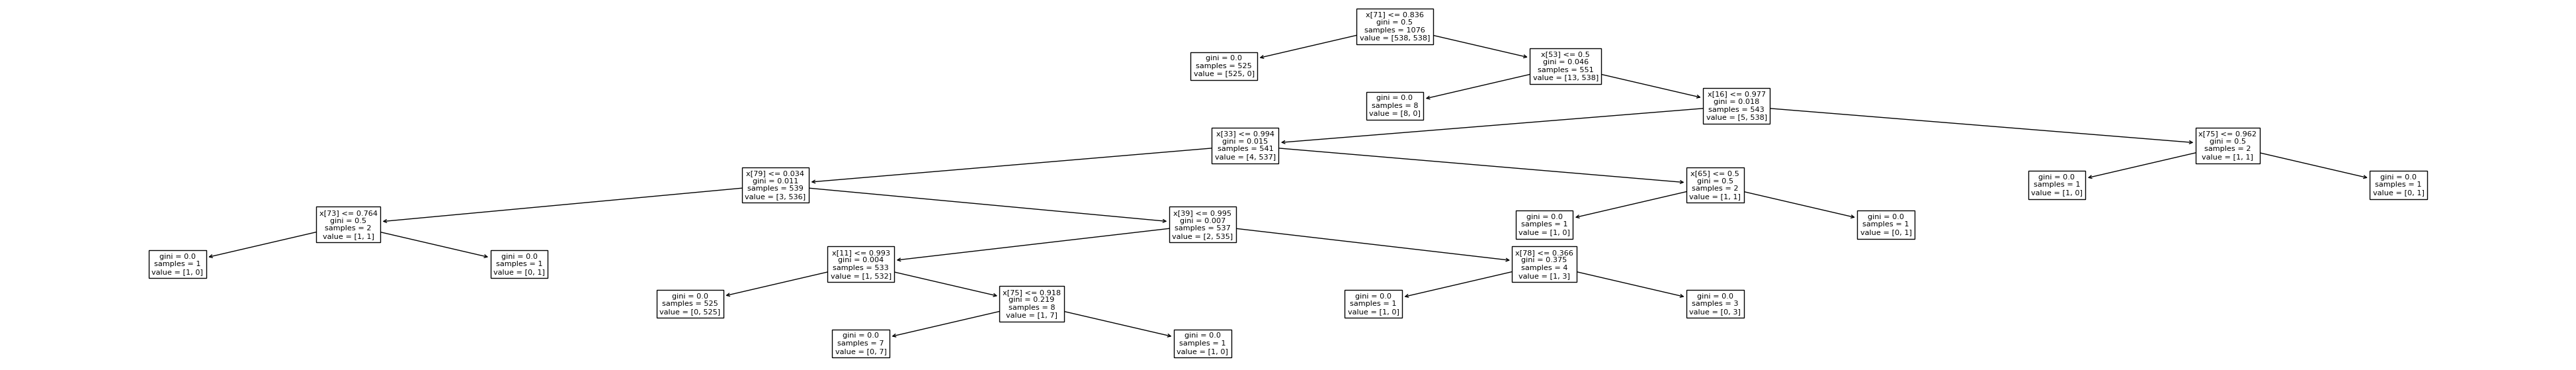

In [245]:
from sklearn.tree import plot_tree
plot_tree(clf)